In [13]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("data\data.csv", delimiter=";")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_ANAMNESE    328 non-null    object
 1   IDADE          328 non-null    int64 
 2   Q1             328 non-null    object
 3   Q2             327 non-null    object
 4   Q3             327 non-null    object
 5   Q4             327 non-null    object
 6   Q5             322 non-null    object
 7   Q6             328 non-null    object
 8   Q7             328 non-null    object
 9   Q8             327 non-null    object
 10  Q9             328 non-null    object
 11  Q10            328 non-null    object
 12  Classificação  328 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 33.4+ KB


In [16]:
df = df.drop(columns=["ID_ANAMNESE"])

In [17]:
df = pd.get_dummies(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   IDADE          328 non-null    int64
 1   Classificação  328 non-null    int64
 2   Q1_não         328 non-null    bool 
 3   Q1_sim         328 non-null    bool 
 4   Q2_não         328 non-null    bool 
 5   Q2_sim         328 non-null    bool 
 6   Q3_não         328 non-null    bool 
 7   Q3_sim         328 non-null    bool 
 8   Q4_não         328 non-null    bool 
 9   Q4_sim         328 non-null    bool 
 10  Q5_forte       328 non-null    bool 
 11  Q5_fraco       328 non-null    bool 
 12  Q5_moderado    328 non-null    bool 
 13  Q6_não         328 non-null    bool 
 14  Q6_sim         328 non-null    bool 
 15  Q7_não         328 non-null    bool 
 16  Q7_não         328 non-null    bool 
 17  Q7_sim         328 non-null    bool 
 18  Q8_não         328 non-null    bool 
 19  Q8_sim  

In [18]:
df["classificacao_1"] = df["Classificação"].apply(lambda x: 1 if x == 1 else 0)
df["classificacao_2"] = df["Classificação"].apply(lambda x: 1 if x == 2 else 0)
df["classificacao_3"] = df["Classificação"].apply(lambda x: 1 if x == 3 else 0)
df = df.drop(columns=["IDADE","Classificação"])

In [19]:
df = df.fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Q1_não           328 non-null    int64
 1   Q1_sim           328 non-null    int64
 2   Q2_não           328 non-null    int64
 3   Q2_sim           328 non-null    int64
 4   Q3_não           328 non-null    int64
 5   Q3_sim           328 non-null    int64
 6   Q4_não           328 non-null    int64
 7   Q4_sim           328 non-null    int64
 8   Q5_forte         328 non-null    int64
 9   Q5_fraco         328 non-null    int64
 10  Q5_moderado      328 non-null    int64
 11  Q6_não           328 non-null    int64
 12  Q6_sim           328 non-null    int64
 13  Q7_não           328 non-null    int64
 14  Q7_não           328 non-null    int64
 15  Q7_sim           328 non-null    int64
 16  Q8_não           328 non-null    int64
 17  Q8_sim           328 non-null    int64
 18  Q9_não    

In [ ]:
cols = df.columns
n = len(cols)
jaccard_col_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        jaccard_col_matrix[i, j] = jaccard_score(
            df.iloc[:, i],
            df.iloc[:, j],
            average="micro",
        )

jaccard_col_df = pd.DataFrame(jaccard_col_matrix, index=cols, columns=cols)
print(jaccard_col_df)

                   Q1_não    Q1_sim    Q2_não    Q2_sim    Q3_não    Q3_sim  \
Q1_não           1.000000  0.000000  0.319920  0.344262  0.441758  0.237736   
Q1_sim           0.000000  1.000000  0.347023  0.322581  0.240076  0.444934   
Q2_não           0.319920  0.347023  1.000000  0.001527  0.291339  0.375262   
Q2_sim           0.344262  0.322581  0.001527  1.000000  0.381053  0.291339   
Q3_não           0.441758  0.240076  0.291339  0.381053  1.000000  0.001527   
Q3_sim           0.237736  0.444934  0.375262  0.291339  0.001527  1.000000   
Q4_não           0.407725  0.266409  0.244782  0.438596  0.596107  0.146853   
Q4_sim           0.268859  0.404711  0.438596  0.240076  0.146853  0.588378   
Q5_forte         0.327935  0.338776  0.325253  0.344262  0.244782  0.432314   
Q5_fraco         0.398721  0.273786  0.251908  0.429194  0.607843  0.140870   
Q5_moderado      0.333333  0.333333  0.314629  0.355372  0.416847  0.261538   
Q6_não           0.369520  0.299010  0.286275  0.381

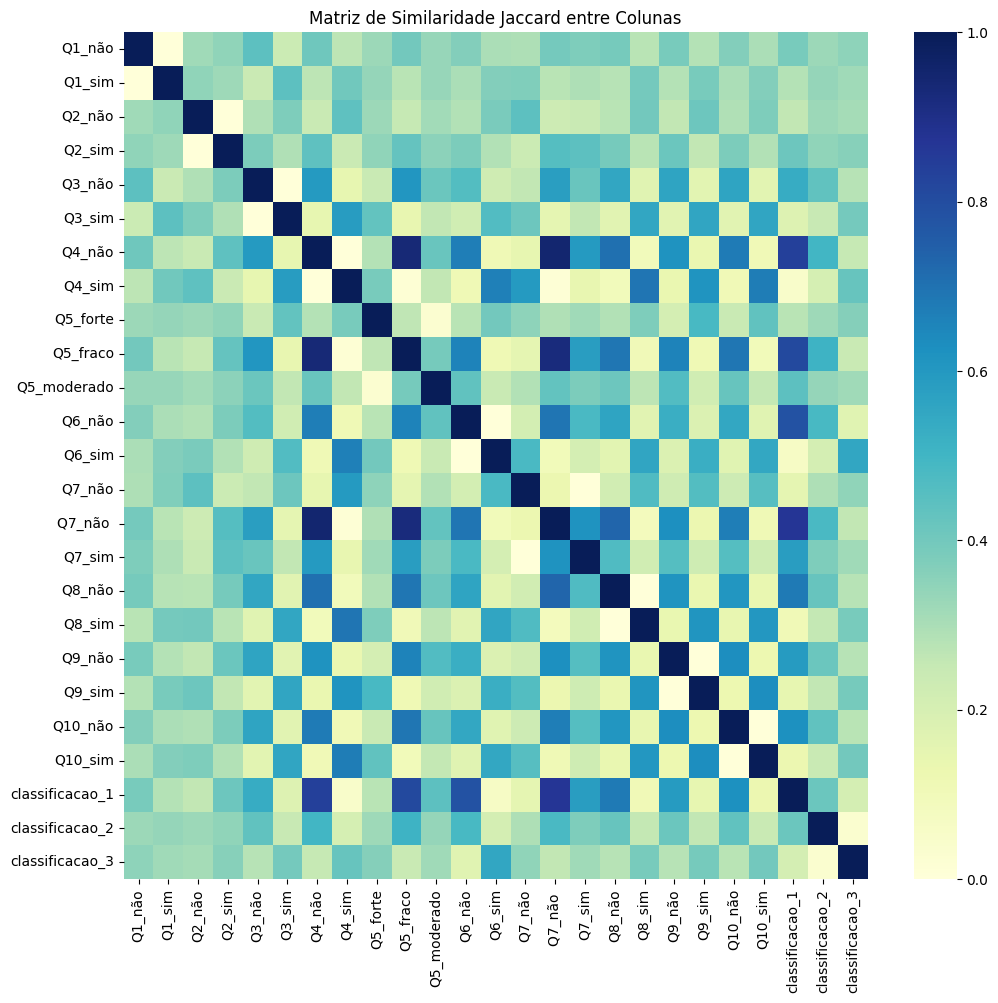

In [21]:
plt.figure(figsize=(12, 11))
sns.heatmap(jaccard_col_df, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Matriz de Similaridade Jaccard entre Colunas")
plt.show()

In [22]:
profile = ProfileReport(df, title="Relatório de Profiling")
profile.to_file("relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 208.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]